STATISTICAL AND MACHINE LEARNING MBD 2021-2022

GROUP PROJECT (GROUP-13)
- MANTILLA Omar
- SERRANO Mario
- SRIPADA Sai Sumanth


In [2]:
#Data Processing and EDA 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Models 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import precision_score, recall_score


### Reading the Data

In [3]:
train_df = pd.read_csv("credit_default_train.csv")
test_df  = pd.read_csv("credit_default_test.csv")

Data Exploration

In [4]:
train_df.dtypes

cust_id                         int64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [5]:
train_df.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,0.0,0.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,2.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,-2.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [6]:
#checking unique values in the SEX, EDUCATION and AGE 
print("unique values in SEX :" + str(train_df['SEX'].unique()))
print("unique values in AGE :" + str(train_df['AGE'].unique()))
print("unique values in EDUCATION :" + str(train_df['EDUCATION'].unique()))

unique values in SEX :[ 1.  2. nan]
unique values in AGE :[34. 26. 27. 55. 29. 37. 44. 30. 36. 35. 41. 32. 24. 42. 47. 38. 52. 48.
 51. 40. 54. 28. nan 45. 58. 23. 50. 39. 25. 43. 22. 33. 31. 46. 62. 56.
 53. 21. 57. 49. 61. 59. 66. 64. 65. 70. 60. 73. 68. 75. 63. 71. 69. 67.
 74. 72.]
unique values in EDUCATION :[ 3.  2.  1. nan  5.  4.  6.  0.]


Checking Null Values 

In [7]:
train_df.isnull().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

# EDA

([<matplotlib.axis.XTick at 0x15459c87c10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

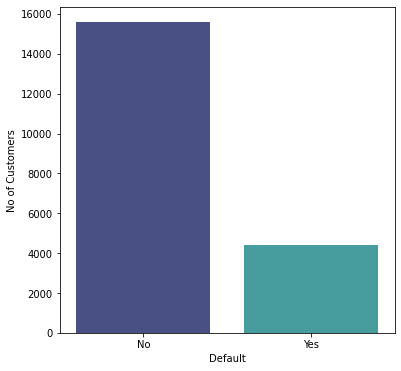

In [8]:
#Subscribers Count
plt.figure(figsize=(6,6))

ax = sns.countplot(x="default.payment.next.month", data=train_df, palette="mako")

plt.xlabel("Default", fontsize=10)
plt.ylabel("No of Customers", fontsize= 10)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 10)

AGE DISTRIBUTION
- maximum customers are in the range of 20-50

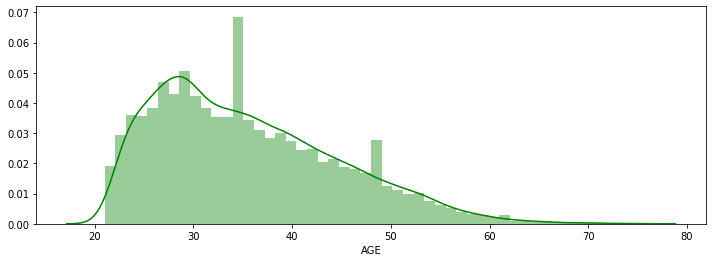

In [9]:
#AGE DISTRIBUTION
plt.figure(figsize=(12,4))

sns.distplot(train_df['AGE'], color= 'g')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

Checking correlation Among the Features

<AxesSubplot:>

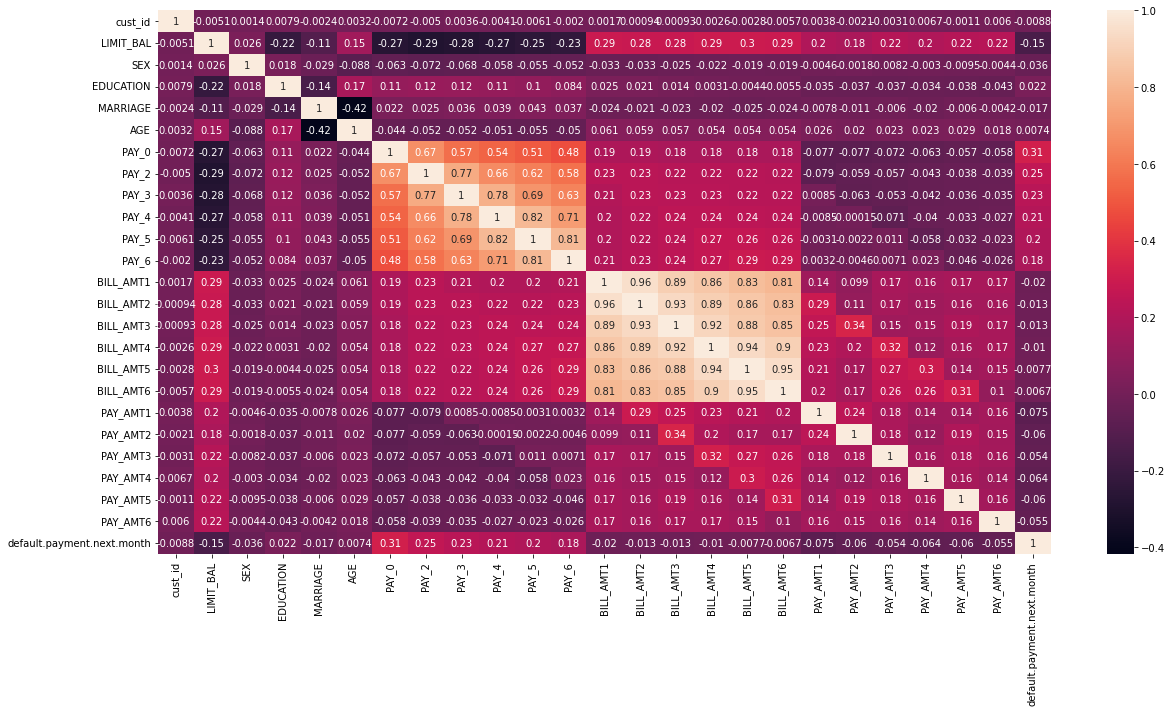

In [10]:
# correlation
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(method='pearson'),annot=True)

In [11]:
#Categorical Variables 

cat_vars = train_df[['SEX', 'EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Correlation for Categorical Variables
- Payments variables are highly Correlated with each other

<AxesSubplot:>

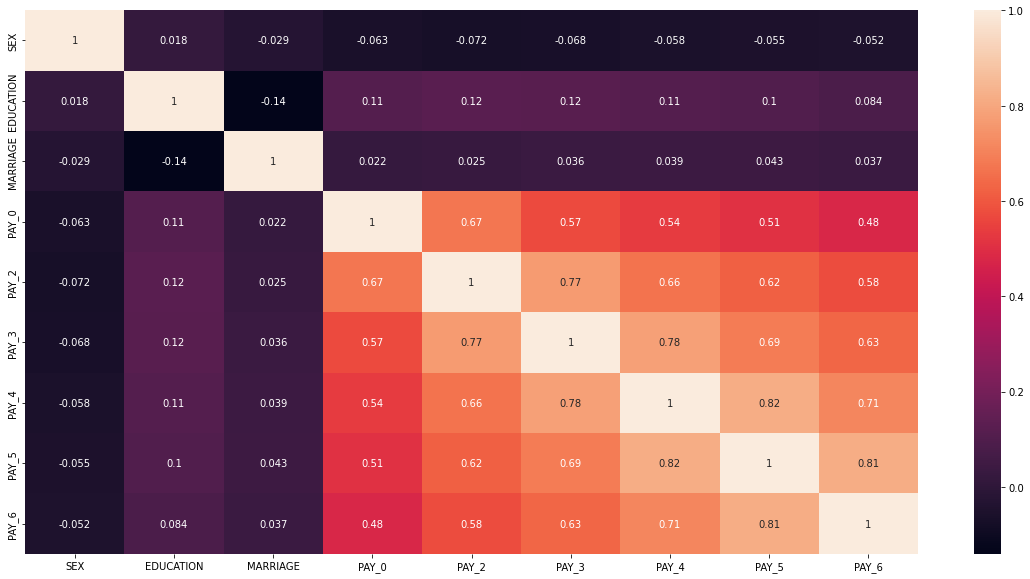

In [12]:
# correlation Cat variables
plt.figure(figsize=(20,10))
sns.heatmap(cat_vars.corr(method='pearson'),annot=True)

FIRST TRYING TO LOOK AT THE PERFORMANCE BY IMPUTING NULL VALUES WITH 0
- with out preprocessing and Feature Selection

In [13]:
train_df.isna().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

In [14]:
test_df.isna().sum()

cust_id        0
LIMIT_BAL    105
SEX          111
EDUCATION     95
MARRIAGE      97
AGE          124
PAY_0        103
PAY_2        109
PAY_3         87
PAY_4        120
PAY_5        106
PAY_6         88
BILL_AMT1    100
BILL_AMT2    105
BILL_AMT3    105
BILL_AMT4    105
BILL_AMT5    101
BILL_AMT6    104
PAY_AMT1      88
PAY_AMT2     122
PAY_AMT3      87
PAY_AMT4     109
PAY_AMT5      95
PAY_AMT6      93
dtype: int64

In [15]:
#Filling NAs with 0
train_df = train_df.fillna(0)
test_df  = test_df.fillna(0)

In [16]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,stratify=y)

In [17]:
logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [18]:
models = {
    "LOGISTIC"      : logistic,
    "DECISION_TREE" : decision_tree,
    "RANDOM_FOREST" : random_forest
}

In [19]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully


- Decision Tree and Random Forest are Overfitting
- Random Forest gives the Best Test Accuracy 

In [20]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST
Train Accuracy,0.779143,1.000000,1.000000
Test Accuracy,0.778333,0.720833,0.814500
Train Auc,0.645998,1.000000,1.000000
Test Auc,0.641307,0.603239,0.749669


# TREE BASED MODELS 

In [21]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgb           = XGBClassifier()
gb            = GradientBoostingClassifier()
lgbm          = LGBMClassifier()
cat_boost     = CatBoostClassifier()

In [22]:
models = {
    "LOGISTIC"      : logistic,
    "DECISION_TREE" : decision_tree, 
    "RANDOM_FOREST" : random_forest,
    "GB"            : gb,
    "XGB"           : xgb,
    "LGBM"          : lgbm,
    "CAT_BOOST"     : cat_boost
}

In [23]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[10:39:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.031793
0:	learn: 0.6753144	total: 127ms	remaining: 2m 6s
1:	learn: 0.6587168	total: 133ms	remaining: 1m 6s
2:	learn: 0.6432171	total: 140ms	remaining: 46.5s
3:	learn: 0.6287627	total: 147ms	remaining: 36.6s
4:	learn: 0.6156933	total: 154ms	remaining: 30.6s
5:	learn: 0.6037208	total: 160ms	remaining: 26.6s
6:	learn: 0.5925635	total: 167ms	remaining: 23.7s
7:	learn: 0.5820776	total: 173ms	remaining: 21.5s
8

In [24]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,0.779143,1.000000,1.000000,0.827357,0.917214,0.861000,0.864714
Test Accuracy,0.778333,0.721667,0.813500,0.816167,0.801000,0.815833,0.815333
Train Auc,0.645998,1.000000,1.000000,0.815047,0.975240,0.919839,0.909766
Test Auc,0.641307,0.602962,0.750445,0.765012,0.738467,0.755543,0.760349


# DATA PROCESSING 

In [25]:
#Reading the data again
train_df = pd.read_csv("credit_default_train.csv")
test_df  = pd.read_csv("credit_default_test.csv")

In [26]:
train_df.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,0.0,0.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,2.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,-2.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


#### Creating list of Numerical and Cat Variables

In [27]:
# General list of variables
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train_df.columns if v not in id_var + target_var]

# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#### Check and correct data error - Constant variables

In [28]:
# Count number of unique values of each variable
vars_nunique = train_df[num_vars + cat_vars].apply(pd.Series.nunique, dropna=False, axis=0)
cont_vars = vars_nunique.index[vars_nunique < 2].tolist()
print("Drop constant variable:", cont_vars)

# Correct variable list
num_vars = [v for v in num_vars if v not in cont_vars]
cat_vars = [v for v in cat_vars if v not in cont_vars]

# Update train, test
train_df = train_df[id_var + num_vars + cat_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars]

Drop constant variable: []


In [29]:
# Check missing values in train and test data 
print('Train - NA of num vars:', train_df[num_vars].isna().sum().sum())
print('Train - NA of cat vars:', train_df[cat_vars].isna().sum().sum())
print('Test  - NA of num vars:', test_df[num_vars].isna().sum().sum())
print('Test  - NA of cat vars:', test_df[cat_vars].isna().sum().sum())

Train - NA of num vars: 2700
Train - NA of cat vars: 1748
Test  - NA of num vars: 1443
Test  - NA of cat vars: 916


In [30]:
#Dropping variables with high missing percentage (>30%)
na_threshold = 0.3

# Drop num variables with more than 30% missing values
num_na_pct = train_df[num_vars].isnull().mean()
num_vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

# Drop cat variables with more than 30% missing values
cat_na_pct = train_df[cat_vars].isnull().mean()
cat_vars = cat_na_pct[cat_na_pct <= 0.3].index.tolist()
print("Drop cat variables with high missing pct:", cat_na_pct[cat_na_pct > na_threshold].tolist())

# Update train, test
train_df = train_df[id_var + num_vars + cat_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars]

Drop num variables with high missing pct: []
Drop cat variables with high missing pct: []


In [31]:
# List dummary variables to track missing values imputation
na_vars = []

In [32]:
num_vars

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

IMPUTING NUMERICAL COLUMNS 

In [33]:
# Numerical variables
# Build the missing value imputor using the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imp.fit(train_df[num_vars])

# Reconstruct the list of vars + indicators
na_vars = na_vars + [num_vars[v] + "_na" for v in imp.indicator_.features_]
impute_vars = num_vars + na_vars

# Apply on train, test
train_df[impute_vars] = pd.DataFrame(imp.transform(train_df[num_vars]), columns=impute_vars)
test_df[impute_vars] = pd.DataFrame(imp.transform(test_df[num_vars]), columns=impute_vars)

IMPUTING CAT COLUMNS

In [34]:
#Imputing Categorical Columns as Missing 
train_df[cat_vars] = train_df[cat_vars].fillna('Missing')
test_df[cat_vars] = test_df[cat_vars].fillna('Missing')

ENCODING CAT VARIABLES 

In [35]:
# Encode categorical variables as integer values
enc = OrdinalEncoder()
enc.fit(pd.concat([train_df[cat_vars].astype(str), test_df[cat_vars].astype(str)], axis=0))
# Apply on train, test
train_df[cat_vars] = enc.transform(train_df[cat_vars].astype(str))
test_df[cat_vars] = enc.transform(test_df[cat_vars].astype(str))

In [36]:
# Convert bool variable to int
train_df[na_vars] = train_df[na_vars].astype(np.int8)
test_df[na_vars] = test_df[na_vars].astype(np.int8)

Checking variables after Processing

In [37]:
# Print out the final variables
print("# id_var [", len(id_var), "] :", id_var)
print("# num_vars [", len(num_vars), "] :", num_vars[:5], "...")
print("# cat_vars [", len(cat_vars), "] :", cat_vars[:5], "...")
print("# na_vars [", len(na_vars), "] :", na_vars[:5], "...")
print("# target_var [", len(target_var), "] :", target_var)

# id_var [ 1 ] : ['cust_id']
# num_vars [ 14 ] : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3'] ...
# cat_vars [ 9 ] : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2'] ...
# na_vars [ 14 ] : ['LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na', 'BILL_AMT2_na', 'BILL_AMT3_na'] ...
# target_var [ 1 ] : ['default.payment.next.month']


In [38]:
# Sort the data according to the variables list
train_df = train_df[id_var + num_vars + cat_vars + na_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars + na_vars]
print(train_df.shape)
print(test_df.shape)

(20000, 39)
(10000, 38)


In [39]:
train_df

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month
0,18895,70000.0,34.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25102,390000.0,26.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28867,60000.0,27.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1842,140000.0,55.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3371,50000.0,29.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0,4.0,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,36.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,3.0,1.0,0.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19996,25043,30000.0,31.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,14281,20000.0,30.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,3.0,4.0,6.0,5.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19998,28693,240000.0,67.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### FEATURE ENGINEERING AND SELECTION

Creating Age groups based on AGE 


In [40]:
print(train_df['AGE'].min())
print(train_df['AGE'].max())

21.0
75.0


In [41]:
print(train_df['AGE'].unique())

[34.         26.         27.         55.         29.         37.
 44.         30.         36.         35.         41.         32.
 24.         42.         47.         38.         52.         48.
 51.         40.         54.         28.         35.47634691 45.
 58.         23.         50.         39.         25.         43.
 22.         33.         31.         46.         62.         56.
 53.         21.         57.         49.         61.         59.
 66.         64.         65.         70.         60.         73.
 68.         75.         63.         71.         69.         67.
 74.         72.        ]


In [42]:
#TRAIN DATA - AGE
train_df['AGE_GRP'] = 'unknown'
#train_df.loc[train_df['AGE']  < 10 ,['age_group']] = '0_10'
#train_df.loc[(train_df['AGE'] > 9) & (train_df['AGE']< 20) ,['AGE_GRP']] = '10'
train_df.loc[(train_df['AGE'] > 19) & (train_df['AGE']< 30) ,['AGE_GRP']] = '20'
train_df.loc[(train_df['AGE'] > 29) & (train_df['AGE']< 40) ,['AGE_GRP']] = '30'
train_df.loc[(train_df['AGE'] > 39) & (train_df['AGE']< 50) ,['AGE_GRP']] = '40'
train_df.loc[(train_df['AGE'] > 49) & (train_df['AGE']< 60) ,['AGE_GRP']] = '50'
train_df.loc[(train_df['AGE'] > 59) & (train_df['AGE']< 70) ,['AGE_GRP']] = '60'
train_df.loc[(train_df['AGE'] > 69) & (train_df['AGE']< 80) ,['AGE_GRP']] = '70'
train_df.loc[(train_df['AGE'] > 79) & (train_df['AGE']< 90) ,['AGE_GRP']] = '80'
train_df.loc[train_df['AGE'] > 89 ,['AGE_GRP']] = '90'

In [43]:
#TEST DATA - AGE
test_df['AGE_GRP'] = 'unknown'
#train_df.loc[train_df['AGE']  < 10 ,['age_group']] = '0_10'
#train_df.loc[(train_df['AGE'] > 9) & (train_df['AGE']< 20) ,['AGE_GRP']] = '10'
test_df.loc[(test_df['AGE'] > 19) & (test_df['AGE']< 30) ,['AGE_GRP']] = '20'
test_df.loc[(test_df['AGE'] > 29) & (test_df['AGE']< 40) ,['AGE_GRP']] = '30'
test_df.loc[(test_df['AGE'] > 39) & (test_df['AGE']< 50) ,['AGE_GRP']] = '40'
test_df.loc[(test_df['AGE'] > 49) & (test_df['AGE']< 60) ,['AGE_GRP']] = '50'
test_df.loc[(test_df['AGE'] > 59) & (test_df['AGE']< 70) ,['AGE_GRP']] = '60'
test_df.loc[(test_df['AGE'] > 69) & (test_df['AGE']< 80) ,['AGE_GRP']] = '70'
test_df.loc[(test_df['AGE'] > 79) & (test_df['AGE']< 90) ,['AGE_GRP']] = '80'
test_df.loc[test_df['AGE'] > 89 ,['AGE_GRP']] = '90'

In [44]:
train_df.head(2)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,AGE_GRP
0,18895,70000.0,34.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
1,25102,390000.0,26.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,1.0,2.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [45]:
test_df.head(2)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,AGE_GRP
0,18847,130000.0,33.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
1,26803,50000.0,22.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [46]:
#Dropping Age 
del train_df['AGE']
del test_df['AGE']

In [47]:
# Check mutual information for all variables
mutual_info = mutual_info_classif(train_df[cat_vars], train_df[target_var].values.squeeze())
mutual_info = pd.Series(mutual_info, index=cat_vars)
print("Top 6 vars :"); print(mutual_info.sort_values(ascending=False)[:6])

Top 6 vars :
PAY_0    0.070808
PAY_2    0.049568
PAY_3    0.036769
PAY_6    0.031805
PAY_4    0.031666
PAY_5    0.027711
dtype: float64


- We can see all the Pay features are highly dependent on each other hence creating a new feature by taking the mean of the 6 variables

In [48]:
#Creating PAY feature 
train_df['PAY_MEAN'] = train_df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6']].mean(axis=1)
test_df['PAY_MEAN'] = train_df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6']].mean(axis=1)

Dropping all the PAY_AMT Features

In [49]:
train_df = train_df.drop(['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6'], axis = 1)
test_df  = test_df.drop(['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6'], axis = 1)

In [50]:
#Deleting AGE_na

del train_df['AGE_na']
del test_df['AGE_na']

ENCODING AGE_GRP

- train_df

In [51]:
# Get one hot encoding of column AGE_GRP
one_hot = pd.get_dummies(train_df.AGE_GRP ,prefix='AGE_GROUP' )
# Drop column AGE_GRP as it is now encoded
train_df = train_df.drop('AGE_GRP',axis = 1)
# Join the encoded df
train_df = train_df.join(one_hot)

In [52]:
train_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18895,70000.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,25102,390000.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,28867,60000.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.166667,1,0,0,0,0,0
3,1842,140000.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,1,0,0
4,3371,50000.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.833333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.666667,0,1,0,0,0,0
19996,25043,30000.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
19997,14281,20000.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.000000,0,1,0,0,0,0
19998,28693,240000.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,0,1,0


ENCODING AGE_GRP
- test_df

In [53]:
# Get one hot encoding of column AGE_GRP
one_hot = pd.get_dummies(test_df.AGE_GRP ,prefix='AGE_GROUP' )
# Drop column AGE_GRP as it is now encoded
test_df = test_df.drop('AGE_GRP',axis = 1)
# Join the encoded df
test_df = test_df.join(one_hot)
test_df.head(2)

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18847,130000.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,0,0
1,26803,50000.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1,0,0,0,0,0


In [54]:
train_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18895,70000.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,25102,390000.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,28867,60000.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.166667,1,0,0,0,0,0
3,1842,140000.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,1,0,0
4,3371,50000.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.833333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.666667,0,1,0,0,0,0
19996,25043,30000.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
19997,14281,20000.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.000000,0,1,0,0,0,0
19998,28693,240000.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,0,1,0


In [55]:
test_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18847,130000.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,26803,50000.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,2986,150000.0,87721.0,87396.0,79424.0,76350.0,79721.0,77028.0,7200.0,3000.0,0.0,6000.0,0.0,3000.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.166667,0,1,0,0,0,0
3,25718,90000.0,866.0,148.0,377.0,4229.0,6109.0,8832.0,148.0,377.0,4000.0,2109.0,2832.0,316.0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
4,29710,20000.0,170.0,-220.0,-610.0,390.0,0.0,19993.0,0.0,0.0,1390.0,0.0,20773.0,400.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.833333,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10120,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.666667,0,1,0,0,0,0
9996,22927,140000.0,5349.0,2210.0,5472.0,0.0,544.0,0.0,2216.0,5472.0,0.0,544.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,1,0,0,0
9997,27164,170000.0,69314.0,65083.0,67062.0,68188.0,56454.0,58453.0,2330.0,3028.0,2847.0,2600.0,3400.0,2045.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
9998,27530,390000.0,0.0,0.0,0.0,0.0,0.0,5112.0,0.0,0.0,0.0,0.0,5112.0,0.0,0.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,1,0,0,0


In [56]:
train_df.columns

Index(['cust_id', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION',
       'MARRIAGE', 'LIMIT_BAL_na', 'BILL_AMT1_na', 'BILL_AMT2_na',
       'BILL_AMT3_na', 'BILL_AMT4_na', 'BILL_AMT5_na', 'BILL_AMT6_na',
       'PAY_AMT1_na', 'PAY_AMT2_na', 'PAY_AMT3_na', 'PAY_AMT4_na',
       'PAY_AMT5_na', 'PAY_AMT6_na', 'default.payment.next.month', 'PAY_MEAN',
       'AGE_GROUP_20', 'AGE_GROUP_30', 'AGE_GROUP_40', 'AGE_GROUP_50',
       'AGE_GROUP_60', 'AGE_GROUP_70'],
      dtype='object')

In [57]:
# General list of variables
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train_df.columns if v not in id_var + target_var]

# # List of numerical and catergorical variables
# num_vars = ['LIMIT_BAL', 'AGE',
#             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
#             'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [58]:
train_df = train_df[id_var + predictors + target_var]

In [59]:
# Sort the data according to the variables list
train_df = train_df[id_var + predictors + target_var]
test_df = test_df[id_var + predictors]
print(train_df.shape)
print(test_df.shape)

(20000, 38)
(10000, 37)


In [60]:
train_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70,default.payment.next.month
0,18895,70000.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0,0
1,25102,390000.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0,0
2,28867,60000.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.166667,1,0,0,0,0,0,1
3,1842,140000.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,1,0,0,0
4,3371,50000.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.833333,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.666667,0,1,0,0,0,0,0
19996,25043,30000.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0,0
19997,14281,20000.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,0,1,0,0,0,0,1
19998,28693,240000.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,0,1,0,0


In [61]:
train_df.to_csv("basetable1.csv")

#### FEATURE SELECTION USING SEQUENTIAL FEATURE SELECTOR

In [59]:
from sklearn.linear_model import Lasso

# APPLYING MODELS AFTER PROCESSING

## Split the data

In [62]:
from sklearn.model_selection import train_test_split

X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [63]:
decision_tree = DecisionTreeClassifier(max_depth = 2)
random_forest = RandomForestClassifier(max_depth = 2)
xgb           = XGBClassifier(max_depth = 2)
gb            = GradientBoostingClassifier(max_depth = 2)
lgbm          = LGBMClassifier(max_depth = 2)
cat_boost     = CatBoostClassifier(max_depth = 2)

In [64]:
models = {
    "LOGISTIC"      : logistic,
    "DECISION_TREE" : decision_tree, 
    "RANDOM_FOREST" : random_forest,
    "GB"            : gb,
    "XGB"           : xgb,
    "LGBM"          : lgbm,
    "CAT_BOOST"     : cat_boost
}

In [65]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[10:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.033658
0:	learn: 0.6772734	total: 49.7ms	remaining: 49.7s
1:	learn: 0.6627594	total: 78.9ms	remaining: 39.4s
2:	learn: 0.6490353	total: 100ms	remaining: 33.3s
3:	learn: 0.6361508	total: 122ms	remaining: 30.4s
4:	learn: 0.6238427	total: 151ms	remaining: 30s
5:	learn: 0.6131723	total: 174ms	remaining: 28.8s
6:	learn: 0.6033699	total: 197ms	remaining: 28s
7:	learn: 0.5936163	total: 220ms	remaining: 27.3s
8:	

In [66]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,0.780000,0.794937,0.780062,0.802375,0.810438,0.801188,0.807813
Test Accuracy,0.776250,0.796750,0.776250,0.799000,0.797250,0.798750,0.796250
Train Auc,0.643489,0.711228,0.740727,0.768300,0.790052,0.767506,0.778059
Test Auc,0.651771,0.710614,0.735352,0.754068,0.751265,0.752106,0.755061


CROSS Validation for CAT_BOOST

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
model = CatBoostClassifier(max_depth =2)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

AUC: 0.753 (0.015)


# MODEL EVALUATION - CATBOOST

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [143]:
cat_model = CatBoostClassifier(
    iterations = 1000, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    
)

In [144]:
# training the model
cat_model.fit(X_train,y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6427212	total: 944ms	remaining: 15m 42s
1:	learn: 0.6023557	total: 2.02s	remaining: 16m 50s
2:	learn: 0.5724200	total: 3.33s	remaining: 18m 26s
3:	learn: 0.5471301	total: 4.36s	remaining: 18m 6s
4:	learn: 0.5295637	total: 5.73s	remaining: 19m
5:	learn: 0.5134363	total: 6.83s	remaining: 18m 52s
6:	learn: 0.5012306	total: 7.57s	remaining: 17m 53s
7:	learn: 0.4909979	total: 8.39s	remaining: 17m 20s
8:	learn: 0.4823665	total: 9.1s	remaining: 16m 41s
9:	learn: 0.4762638	total: 10.4s	remaining: 17m 9s
10:	learn: 0.4706174	total: 11.6s	remaining: 17m 19s
11:	learn: 0.4655853	total: 12.7s	remaining: 17m 26s
12:	learn: 0.4616435	total: 14.2s	remaining: 17m 55s
13:	learn: 0.4585125	total: 15.4s	remaining: 18m 3s
14:	learn: 0.4556148	total: 16.7s	remaining: 18m 19s
15:	learn: 0.4533823	total: 17.7s	remaining: 18m 6s
16:	learn: 0.4519332	total: 18.7s	remaining: 18m 3s
17:	learn: 0.4498368	total: 19.6s	remaining: 17m 48s
18:	learn: 0.4480130	total: 20.4s	remaining: 17m 31s
19:	learn: 0.

In [146]:
# predicting the model output
y_pred_cat = cat_model.predict(X_test)
# printing the accuracy of the tuned model
print("accuracy of the catboost: ",accuracy_score(y_test,y_pred_cat))
print("AUC of catboost : ", roc_auc_score(y_test,y_pred_cat))

accuracy of the catboost:  0.79125
AUC of catboost :  0.6150334205957232


In [66]:
#pip install shap --user

  Using cached shap-0.40.0-cp39-cp39-win_amd64.whl (432 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
  Using cached numba-0.55.1-cp39-cp39-win_amd64.whl (2.4 MB)
  Using cached llvmlite-0.38.0-cp39-cp39-win_amd64.whl (23.2 MB)


In [69]:
from catboost import *
import shap
shap.initjs()

In [79]:
X_train

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
7013,24636,20000.000000,10747.0,11558.0,9961.0,10310.0,10372.0,9838.0,1317.0,1150.0,499.0,361.0,573.0,193.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
7766,19465,50000.000000,1050.0,1050.0,1050.0,1050.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.333333,1,0,0,0,0,0
5910,25041,400000.000000,10150.0,5869.0,5750.0,132866.0,21780.0,41050.0,5869.0,5750.0,132872.0,21780.0,20525.0,74984.0,1.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,1,0,0,0,0
7020,25363,490000.000000,345075.0,354273.0,57454.0,59860.0,29377.0,30478.0,10000.0,4000.0,3500.0,978.0,1500.0,3500.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,1,0,0,0
16952,11957,50000.000000,5219.0,6475.0,7483.0,7709.0,7934.0,8242.0,1500.0,1274.0,500.0,500.0,440.0,450.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,22269,260000.000000,399.0,2101.0,577.0,0.0,200.0,0.0,2101.0,577.0,0.0,200.0,0.0,664.0,1.0,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,1,0,0,0
17289,27845,166701.872916,10668.0,-2.0,454.0,150198.0,143388.0,157758.0,0.0,456.0,150244.0,2915.0,24550.0,100.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.666667,0,0,1,0,0,0
5192,3022,130000.000000,1985.0,1666.0,1306.0,2049.0,0.0,0.0,1671.0,1306.0,2049.0,0.0,0.0,1497.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.666667,1,0,0,0,0,0
12172,25724,320000.000000,281017.0,187071.0,150441.0,167983.0,142305.0,153555.0,10454.0,80003.0,174169.0,10000.0,15013.0,1770.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.666667,0,1,0,0,0,0


In [ ]:
iterations=300, learning_rate=0.1,

In [80]:
model = CatBoostClassifier(max_depth=2)
model.fit(X_train, y_train)


y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  roc_auc_score(y_train,y_pred_train)
test_auc =  roc_auc_score(y_test, y_pred_test)
print("Train ACC is :" +  str(train_accuracy) )
print("Test  ACC is :" +  str(test_accuracy))
print("Train AUC is :" +  str(train_auc) )
print("Test  AUC is :" +  str(test_auc))

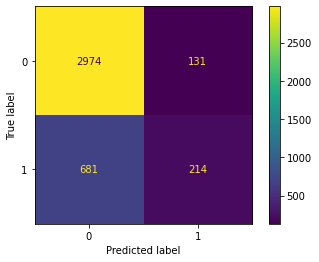

In [82]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [83]:
#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  roc_auc_score(y_train,y_pred_train)
test_auc =  roc_auc_score(y_test, y_pred_test)
print("Train ACC is :" +  str(train_accuracy) )
print("Test  ACC is :" +  str(test_accuracy))
print("Train AUC is :" +  str(train_auc) )
print("Test  AUC is :" +  str(test_auc))

Train ACC is :0.8068125
Test  ACC is :0.797
Train AUC is :0.6080502722194001
Test  AUC is :0.5984580645741686


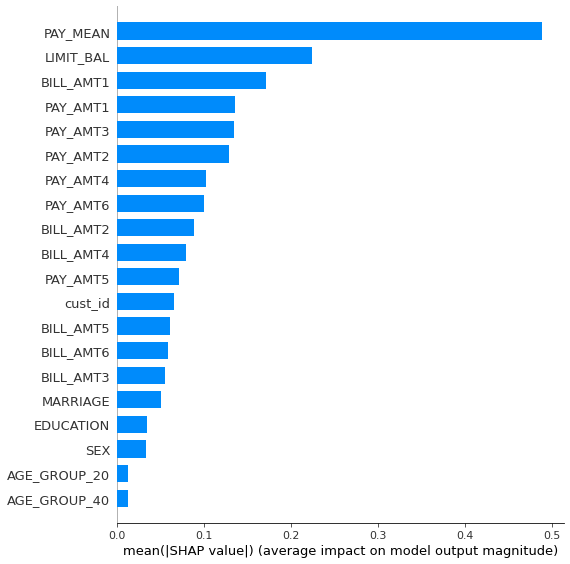

In [71]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [84]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
#training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

FEATURE IMPORTANCE OF THE CATBOOST

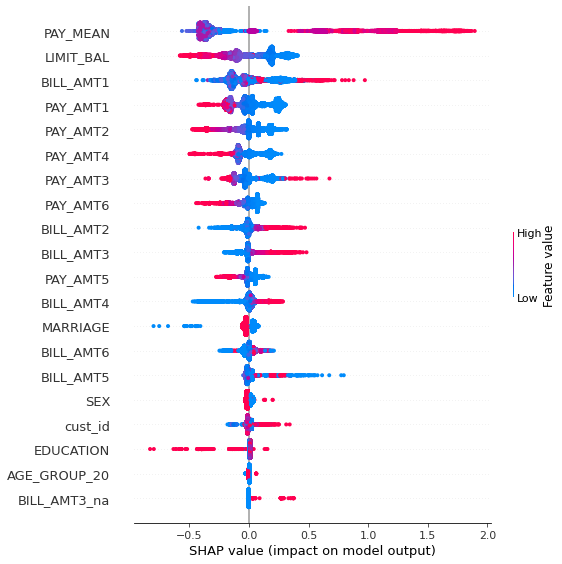

In [85]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

In [80]:
# from catboost import CatBoostClassifier, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

# feature_names = ['F{}'.format(i) for i in range(X_train.shape[1])]
# train_pool = Pool(X_train, y_train, feature_names=feature_names)
# test_pool = Pool(X_test, y_test, feature_names=feature_names)


# model = CatBoostClassifier(iterations=1000, random_seed=0)
# summary = model.select_features(
#     train_pool,
#     eval_set=test_pool,
#     features_for_select='0-36',
#     num_features_to_select=10,
#     steps=3,
#     algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
#     shap_calc_type=EShapCalcType.Regular,
#     train_final_model=True,
#     plot=True
# )

SELECTING BEST MODELS AND FEATURE SELECTION
- From the Above results, proceeding with the CATBOOST Algorithm

In [68]:
# Forward Stepwise Feature Selection 
from sklearn.linear_model import Lasso
# Sequential Forward Selection(sfs)
lasso = Lasso()
sfs = SFS(lasso,
          k_features=5,
          forward=False,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)
sfs.fit(X_train, y_train)
backward_features = sfs.k_feature_names_ 


In [69]:
backward_features

('BILL_AMT1', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3')

CATBOOST WITH SELECTED FEATURES 


In [73]:
X_train = X_train[['BILL_AMT1', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']]
X_test = X_test[['BILL_AMT1', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']]

In [75]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[00:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.033658
0:	learn: 0.6804493	total: 98.6ms	remaining: 1m 38s
1:	learn: 0.6688236	total: 158ms	remaining: 1m 18s
2:	learn: 0.6577159	total: 225ms	remaining: 1m 14s
3:	learn: 0.6476576	total: 283ms	remaining: 1m 10s
4:	learn: 0.6378243	total: 342ms	remaining: 1m 8s
5:	learn: 0.6291080	total: 379ms	remaining: 1m 2s
6:	learn: 0.6204983	total: 398ms	remaining: 56.4s
7:	learn: 0.6131576	total: 415ms	remaining: 51

- AUC Dropped after Selected Features (Lasso)

In [76]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,0.782062,0.780062,0.780062,0.786438,0.789875,0.786062,0.787375
Test Accuracy,0.776500,0.776250,0.776250,0.777000,0.775750,0.775500,0.776500
Train Auc,0.633058,0.612742,0.670021,0.713860,0.735568,0.711626,0.720951
Test Auc,0.621786,0.596682,0.648681,0.687763,0.687308,0.686426,0.689927


In [ ]:
cat_model = CatBoostClassifier(
    iterations = 1000, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    task_type = "GPU",
)

#### Experimental setup

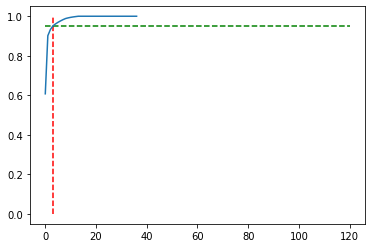

In [78]:
from sklearn.decomposition import PCA
# Decide the number of PCA components based on the retained information
pca = PCA(random_state=88)
pca.fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)

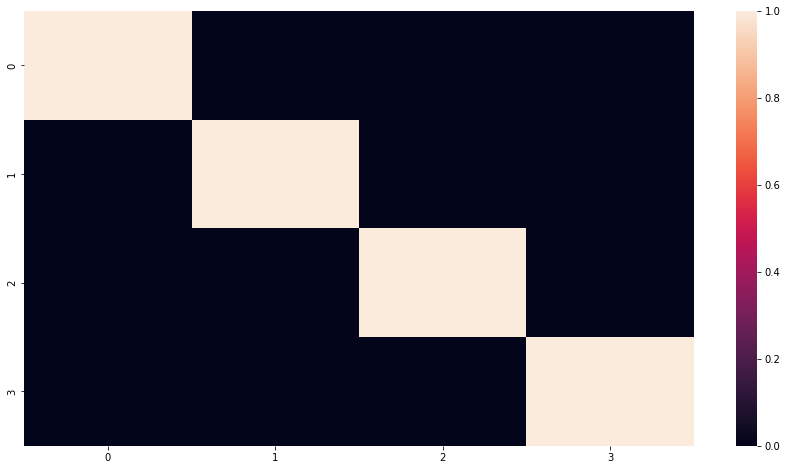

In [79]:
# Train the PCA model 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_train_pca = pca_final.fit_transform(X_train)
 
# Note that the above can be automated like this: (without using plot)
pca_final = PCA(0.95)
df_train_pca = pca_final.fit_transform(X_train)
 
# Check the correlations between components
corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()

In [84]:
# Apply PCA model to the test data
df_test_pca = pca_final.transform(X_test)

In [85]:
# Train the Catboost  model
cat_PCA_Learner = CatBoostClassifier()
cat_PCA_Model = cat_PCA_Learner.fit(df_train_pca, y_train)

Learning rate set to 0.033658
0:	learn: 0.6794744	total: 58.5ms	remaining: 58.4s
1:	learn: 0.6666895	total: 100ms	remaining: 50.1s
2:	learn: 0.6550695	total: 132ms	remaining: 44s
3:	learn: 0.6442223	total: 200ms	remaining: 49.7s
4:	learn: 0.6341364	total: 243ms	remaining: 48.3s
5:	learn: 0.6247980	total: 267ms	remaining: 44.3s
6:	learn: 0.6160674	total: 307ms	remaining: 43.5s
7:	learn: 0.6077483	total: 336ms	remaining: 41.7s
8:	learn: 0.6001935	total: 362ms	remaining: 39.9s
9:	learn: 0.5934028	total: 396ms	remaining: 39.2s
10:	learn: 0.5869115	total: 420ms	remaining: 37.7s
11:	learn: 0.5809526	total: 454ms	remaining: 37.4s
12:	learn: 0.5756532	total: 492ms	remaining: 37.3s
13:	learn: 0.5703917	total: 515ms	remaining: 36.3s
14:	learn: 0.5654032	total: 542ms	remaining: 35.6s
15:	learn: 0.5612758	total: 563ms	remaining: 34.6s
16:	learn: 0.5570952	total: 589ms	remaining: 34s
17:	learn: 0.5533375	total: 615ms	remaining: 33.6s
18:	learn: 0.5498162	total: 642ms	remaining: 33.1s
19:	learn: 0.5

In [88]:
# Calculate the Area Under the Curve (AUC)
pred_test = cat_PCA_Learner.predict_proba(df_test_pca)
"{:2.2}".format(roc_auc_score(y_test, pred_test[:,1]))

'0.66'

In [99]:
models = {
    "LOGISTIC"      : logistic,
    "NEURAL_NET"    : neural_net,
    "DECISION_TREE" : decision_tree,
    "RANDOM_FOREST" : random_forest
}

In [173]:
decision_tree = DecisionTreeClassifier(max_depth = 2)
random_forest = RandomForestClassifier(max_depth = 2)
xgb           = XGBClassifier(max_depth = 2)
gb            = GradientBoostingClassifier(max_depth = 2)
lgbm          = LGBMClassifier(max_depth = 2)
cat_boost     = CatBoostClassifier(max_depth = 2)

In [101]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
NEURAL_NET      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully


In [102]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,NEURAL_NET,DECISION_TREE,RANDOM_FOREST
Train Accuracy,0.780000,0.772625,0.794937,0.780062
Test Accuracy,0.776250,0.760000,0.796750,0.776250
Train Auc,0.643489,0.615268,0.711228,0.739316
Test Auc,0.651771,0.593600,0.710614,0.733492


## OVERSAMPLING 

In [451]:
X = train_df.loc[:, train_df.columns != 'default.payment.next.month']
y = train_df.loc[:, train_df.columns == 'default.payment.next.month']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
columns = X.columns
os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default.payment.next.month'])

# we can Check the numbers of our data
print('length of oversampled data is ',len(os_data_X))
print('Number of no default in oversampled data',len(os_data_y[os_data_y['default.payment.next.month']==0]))
print('Number of default in oversampled data   ',len(os_data_y[os_data_y['default.payment.next.month']==1]))
print('Proportion of no default data in oversampled data is ',len(os_data_y[os_data_y['default.payment.next.month']==0])/len(os_data_X))
print('Proportion of default data in oversampled data is    ',len(os_data_y[os_data_y['default.payment.next.month']==1])/len(os_data_X))

length of oversampled data is  31172
Number of no default in oversampled data 15586
Number of default in oversampled data    15586
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is     0.5


In [472]:
X=os_data_X

y=os_data_y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify = y)

In [474]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[00:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.040681
0:	learn: 0.6818680	total: 107ms	remaining: 1m 46s
1:	learn: 0.6726105	total: 166ms	remaining: 1m 23s
2:	learn: 0.6631798	total: 227ms	remaining: 1m 15s
3:	learn: 0.6542877	total: 259ms	remaining: 1m 4s
4:	learn: 0.6462757	total: 284ms	remaining: 56.5s
5:	learn: 0.6391800	total: 319ms	remaining: 52.8s
6:	learn: 0.6325664	total: 382ms	remaining: 54.2s
7:	learn: 0.6260768	total: 427ms	remaining: 52.9s
8:	learn: 0.6202779	total: 455ms	remaining

In [475]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,0.729759,0.786983,0.863416,0.878494,0.862774,0.874363
Test Accuracy,0.729912,0.788132,0.860626,0.868966,0.861427,0.867362
Train Auc,0.792266,0.862085,0.927941,0.942674,0.927572,0.937644
Test Auc,0.792641,0.864572,0.925603,0.928740,0.925075,0.930715


In [19]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [20]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [21]:
# rf_random

In [100]:
# evaluate a Gradient Boosting model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# create model
model = GradientBoostingClassifier()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

AUC: 0.771 (0.018)


# PREDICTION ON TEST DATA

In [462]:
# Predicting on test data with the best performing Model - Gradient Boost
model = "RANDOM_FOREST"
predictions   = models[model].predict(test_df)
probabilities = pd.DataFrame(models[model].predict_proba(test_df))[1]

In [463]:
cust_id = test_df['cust_id']

In [464]:
#verifying the cust id and probabilities
print(len(cust_id))
print(len(probabilities))

10000
10000


In [468]:
#Merging cust_id and the predicted Probabilities
result  = pd.concat([cust_id, probabilities], axis=1)
#Renaming column 1 to target name
result.rename(columns={1 : 'default.payment.next.month'}, inplace=True)
result

,cust_id,default.payment.next.month
0,18847,0.315524
1,26803,0.591520
2,2986,0.572157
3,25718,0.375868
4,29710,0.647905
...,...,...
9995,10120,0.456612
9996,22927,0.395430
9997,27164,0.338042
9998,27530,0.521800


In [466]:
result['default.payment.next.month'].max()

0.7136782222848068

In [467]:
#Write the results to csv
result.to_csv('rf.csv', index = False)

GRADIENT BOOST TUNING 

In [70]:
# from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV
# parameters = {

#     "loss":["deviance"],

#     "learning_rate": [0.01, 0.025],

#     "min_samples_split": np.linspace(0.1,0.5),

#     "min_samples_leaf": np.linspace(0.1,0.5),

#     "max_depth":[3],

#     "max_features":["log2","sqrt"],

#     "criterion": ["friedman_mse",  "mae"],

#     "subsample":[0.5],

#     "n_estimators":[5]

#     }

# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
# cv = KFold(n_splits=10, random_state=5, shuffle=True)
# scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# # clf.fit(X_train, y_train)
# # print(clf.score(X_train, y_train))
# # print(clf.best_params_)
# scores




